<a href="https://colab.research.google.com/github/sami1220/sp3.LinearRegression/blob/master/SP3_LinearRegression_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# テストデータやライブラリ
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression



In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('train.csv')
x_array = np.array(df.loc[:,'GrLivArea'])
y_array = np.array(df.loc[:,'SalePrice'])
# df_01 = df.loc[:,['GrLivArea','SalePrice']]
x_train, x_test, y_train, y_test = train_test_split(x_array, y_array,test_size=0.25, random_state=42)
print(x_array.shape)
print(y_array.shape)
# x_train, x_test, y_train, y_test = train_test_split(df_01['GrLivArea'].values, df_01['SalePrice'].values, test_size=0.25, random_state=42)

(1460,)
(1460,)


問題1　仮定関数

問題2　最急降下法

問題3　推定

問題5　目的関数

以下のコードで全て実装。コメントアウトで箇所を指示

In [152]:
class ScratchLinearRegression:

    def __init__(self,num_iter,lr,bias,verbose,var=1):
        self.iter = num_iter #学習回数　
        self.lr = lr #学習率
        self.bias = bias #傾き
        self.verbose = verbose
        # 損失関数を保存する（初期値として0）
        self.loss = np.zeros(self.iter+1)
        self.test_loss = np.zeros(self.iter+1)
        self.var=var
        
    # 問題2
    def fit(self, x, y, x_test=None, y_test=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        x : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        x_test : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_test : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        #　theta_listを0配列に初期化する（行:学習回数分、列はxの列に＋1
        self.theta_list = np.zeros((self.iter+1,x.shape[1]+1))
        # 問題1の仮定関数を呼び出す
        self._linear_hypothesis(x)

        # ①********
        # 誤差の初期値としてcalc_errorの戻り値(推定値と実測値の誤差）を用意
        init_error = self.calc_error(x,y)
        # loss関数の0番目
        self.loss[0] = np.sum(init_error**2) /(2 * x.shape[0])

        # もしx_testがNoneでなければ、（x_testがあればってこと）
        if x_test is not None:
            # テスト用の学習データも損失を保存しておく
            # ②********
            # ★calc_errorの引数にテスト用データを入れて、初期化変数に保存しておく
            init_test_error= self.calc_error(x_test,y_test)
            # test_loss関数の0番目
            self.test_loss[0] = np.sum(init_test_error**2)/(2 * x_test.shape[0])
        
        # 問題５
        # 学習回数分繰り返し　目的関数を保存する！！！
        for n in range(self.iter):
            # 計測した値とyデータの誤差をerrorに格納しておく 
            error = self.calc_error(x,y)
            # 勾配降下法による
            loss = self._gradient_descent(x,error)
            self.theta_list[n+1] = self.theta
            self.loss[n+1] = loss
            
            # x_testも入力した場合
            if x_test is True:
                test_error = self.calc_error(x_test,y_test)
                test_loss = np.sum(test_error**2) /(2*x_test.shape[0])
                self.test_loss[n+1]=test_loss
    
    # 問題３
    def predict(self,x):
        """
        xの訓練データを入力して推定結果を返す
        ----------
        prameter
          x : ndarray
            訓練データ
        ----------
        return
          predict_answer : ndarray
            推定結果  
        """
        if self.bias == True:
            predict_answer = x @ self.theta[:-1] + self.theta[-1]
        else:
            predict_answer = x @ self.theta
        
        return predict_answer
    # 問題１
    def _linear_hypothesis(self,x):
        if self.bias:
            # 標準正規分布の乱数（平均0、分散１）をthetaに格納
            self.theta = np.random.randn(x.shape[1]+1)*self.var
            # theta_listの最初の要素にthetaを入れる
            self.theta_list[0] =self.theta
        else:
            self.theta = np.random.randn(x.shape[1])

    # 問題２   
    def _gradient_descent(self, x,error):
        """
        説明変数の訓練用、誤差を入力して、損失関数を返す
        ----------
        parameter
            x : ndarray
              説明変数の訓練用
            error : ndarray
              calc_errorの戻り値（fitでグローバル変数化）
        ----------
        return
            loss
              損失を返す
        """

        # loss = 平均二乗誤差の計算　(hθ(x(i)) - y(i)) ** 2
        sigma_loss = np.sum(error**2)
        m = (2 * len(x))
        loss =  sigma_loss / m
        # ？？　損失数と訓練データの内積（？）を訓練データの数で割り算している
        loss1 = (error.T @ x) * (1 / x.shape[0])
        if self.bias:
          # 次のθの値は、今のθからloss1と学習率をかけた数字を引いた値になる
            self.theta[:-1] =self.theta[:-1] - self.lr * loss1
            self.theta[-1] = self.theta[-1] - (self.lr * np.sum((error/x.shape[0])))
        else:
            self.theta = self.theta - self.lr * loss1
        return loss
        
    def calc_error(self,x,y):
        """
        説明変数の訓練用、目的変数の訓練用を入力、計測値と実測値の誤差を求める
        ----------
        parameter
          x : ndarray
            説明変数の訓練用
          y : ndarray
            目的変数の訓練用
        ----------
        return
          error : ndarray
            誤差を返す
        """
        # 推定値から実測値を引く　＝　誤差をerrorに代入
        # 問題の [hθ(x(i)) - y(i)x(i)j] この式に該当問題2以降発生
        error = self.predict(x) - y
        return error


*問題4*　平均二乗誤差

In [ ]:
# 問題4

def MSE(y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値
    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    sigma_calc = sum((y_pred - y) ** 2)
    mse = sigma_calc / y.shape[0]

    return mse

y_pred_sample = np.arange(1, 11)
y_sample = np.array([1, 3, 4, 5, 8, 9, 11, 13, 14, 15])
print(f'y_pred_sample : {y_pred_sample}')
print(f'y_sample       : {y_sample}')
print(f'My MSE function : {MSE(y_pred_sample,y_sample)}')

from sklearn.metrics import mean_squared_error
print(f'sckit-learnで判定 : {mean_squared_error(y_pred_sample,y_sample)}')

y_pred_sample : [ 1  2  3  4  5  6  7  8  9 10]
y_sample       : [ 1  3  4  5  8  9 11 13 14 15]
My MSE function : 11.2
sckit-learnで判定 : 11.2


問題６　学習と推定

In [170]:
# 自作クラスの結果
mySLR = ScratchLinearRegression(num_iter=10000 ,lr=0.0000002,bias=True,verbose=True)
mySLR.fit(x_train.reshape(-1,1), y_train, x_test.reshape(-1,1), y_test)

my_predict = mySLR.predict(x_array.reshape(-1,1))
print(f'mySLRの推定結果 : \n{my_predict}')

###################################################################

# 線形回帰　sklearnを使った実装結果
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(x_train.reshape(-1,1), y_train)
clf_predict = clf.predict(x_array.reshape(-1,1))
print(f'scikit-learnの推定結果 : \n{clf_predict}')


mySLRの推定結果 : 
[201685.34153328 148846.38138195 210649.09370181 ... 275990.12924608
 127144.66560551 148138.71673706]
scikit-learnの推定結果 : 
[201583.81068277 152115.32321595 209975.78623518 ... 271148.87118298
 131797.90872065 151452.79883023]


問題７　学習曲線のプロット

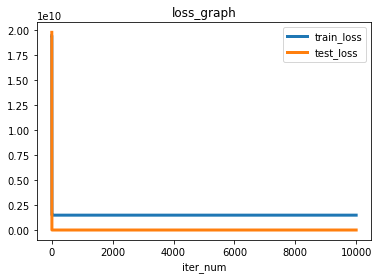

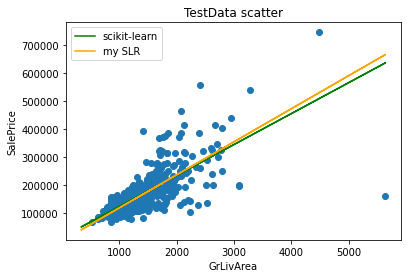

In [186]:
loss_list = mySLR.loss
test_loss_list = mySLR.test_loss

# shapeを調整
loss_list = np.delete(loss_list, 1000, axis=0)
test_loss_list = np.delete(test_loss_list, 1000, axis=0)


# 損失関数について
# 推定結果のグラフ
plt.title('loss_graph')
plt.xlabel('iter_num')
plt.plot(np.arange(mySLR.iter), loss_list, label='train_loss', linewidth="3")
plt.plot(np.arange(mySLR.iter), test_loss_list, label='test_loss',linewidth="3")
plt.legend()
plt.show()

# 元々の目的変数と説明変数の散布図
# グリーン：scikit-learnの線形回帰
# オレンジ：自作したスクラッチの結果
# 散布図：実際の分布
plt.title('TestData scatter')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.plot(x_array, clf_predict, color='green', label="scikit-learn")
plt.plot(x_array, my_predict, color='orange', label="my SLR")
plt.scatter(x_test,y_test)
plt.legend()
plt.show()

